In [2]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
from PIL import Image

In [3]:
train_data = pd.read_csv('BNPP_DT_train_with_ages.csv', index_col = 'unique_key')
train_data.head()

,bnpp_value_log,BNPP_weight,PNA_mask,PNA_wight_mask,BNP_value,age_at_sampletime
unique_key,,,,,,
Flodure_51396672_img1,0.690196,1,None,1,4.9,45
Okepik_50995691_img1,0.690196,1,None,1,4.9,53
Kuesluco_51713925_img1,0.690196,1,None,1,4.9,54
Gumepra_51602745_img1,0.690196,1,None,1,4.9,58
Gapeklik_51060218_img1,0.690196,1,None,1,4.9,19


In [4]:
train_data.shape

(21374, 6)

In [5]:
val_data = pd.read_csv('BNPP_DT_val_with_ages.csv', index_col = 'unique_key')
val_data.head()

,bnpp_value_log,BNPP_weight,PNA_mask,PNA_wight_mask,BNP_value,age_at_sampletime,BNP_value.1,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
unique_key,,,,,,,,,,,,,,,,,
Rienoukro_52935973_img1,3.233504,1.0,None,1.0,1712.0,35.0,1712.0,0,1,0,0,0,1,NaN,0,0,0
Kerascaln_50874869_img1,1.361728,1.0,None,1.0,23.0,54.0,23.0,1,0,0,1,1,1,NaN,0,1,0
Gunueni_50068078_img1,2.330414,1.0,None,1.0,214.0,58.0,214.0,1,0,0,1,1,1,NaN,0,1,0
Fujisa_51077518_img1,3.394277,1.0,None,1.0,2479.0,62.0,2479.0,1,0,0,0,0,0,NaN,0,0,0
Hinirtey_52982727_img1,1.698101,1.0,None,1.0,49.9,39.0,49.9,0,1,0,1,1,1,NaN,1,0,0


In [6]:
val_data.shape

(2692, 17)

In [7]:
test_data = pd.read_csv('BNPP_DT_test_with_ages.csv', index_col = 'unique_key')
test_data.head()

,bnpp_value_log,BNPP_weight,PNA_mask,PNA_wight_mask,BNP_value,age_at_sampletime
unique_key,,,,,,
Defruka_51591102_img1,0.690196,1,None,1,4.9,33
Simefol_50638549_img1,0.690196,1,None,1,4.9,41
Fufeehou_51416184_img1,0.690196,1,None,1,4.9,56
Apororn_51673728_img1,0.690196,1,None,1,4.9,29
Gubutho_51305517_img1,0.690196,1,None,1,4.9,45


In [8]:
test_data.shape

(2602, 6)

In [9]:
train_data.shape[0] + val_data.shape[0] + test_data.shape[0]

26668

In [5]:
# Read H5 file
f = h5.File("bnpp_frontalonly_1024_10.hdf5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]

In [6]:
first_key = list(f.keys())[0]
first_key

'Umefet_51429244_img1'

In [7]:
first_data = np.array(f[first_key])
first_data

array([[ 1150.     ,   991.57574,   889.22   , ...,   364.93158,
          424.56793,   471.     ],
       [ 1120.3812 ,   915.83234,   860.17346, ...,   357.5568 ,
          409.25415,   444.5083 ],
       [ 1032.4056 ,   901.9313 ,   870.71936, ...,   376.0726 ,
          408.83182,   444.94916],
       ...,
       [11184.738  , 10646.195  , 10257.507  , ...,  8331.449  ,
         8116.2607 ,  8211.855  ],
       [12149.729  , 11527.023  , 11249.011  , ...,  9267.892  ,
         9512.013  ,  9446.002  ],
       [12591.     , 12286.253  , 12206.42   , ..., 10557.234  ,
        10781.891  , 10711.     ]], dtype=float32)

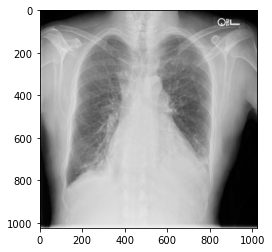

In [17]:
plt.imshow(first_data, cmap='gray')

# Display 10 training data images

In [9]:
keys_to_display = []

In [10]:
for i in train_data.index:
    if i in datasetNames:
        keys_to_display.append(i)

In [11]:
len(keys_to_display)


562

In [12]:
ten_keys = keys_to_display[:10]

In [13]:
f

<HDF5 file "bnpp_frontalonly_1024_10.hdf5" (mode r)>

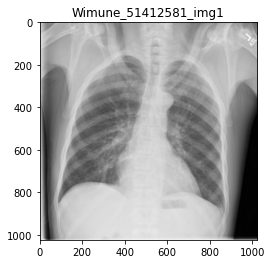

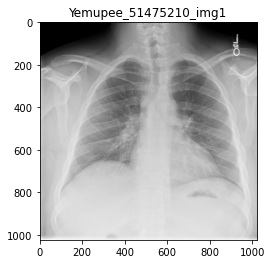

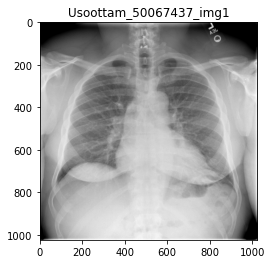

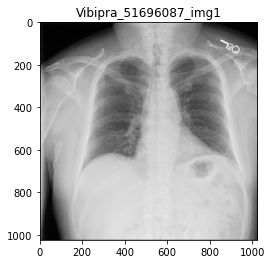

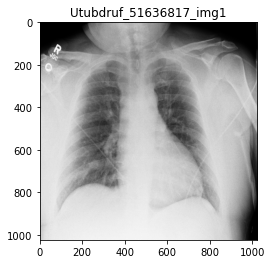

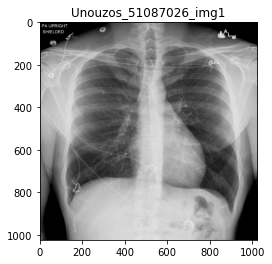

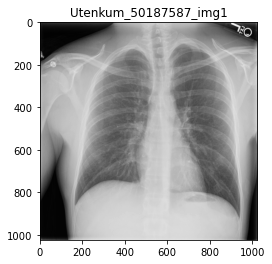

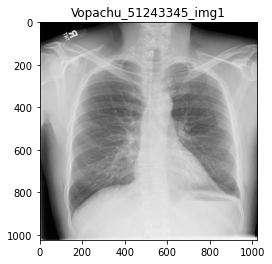

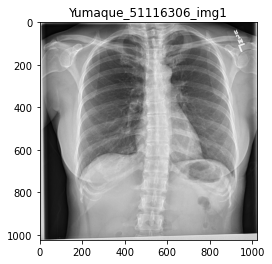

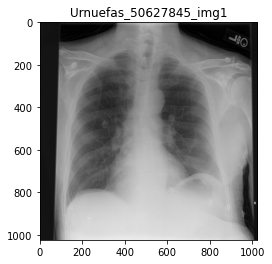

In [15]:
for k in ten_keys:
    data = np.array(f[k])
    plt.imshow(data, cmap='gray')
    plt.title(k)
    plt.show()